In [48]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import decomposition
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics.cluster import homogeneity_score
from sklearn.manifold.t_sne import TSNE
from NMF import simple_nmf
from NMF import nmf_kl

## Creating synthetic dataset 1

In [16]:
np.random.seed(0)
X_train = []
y_train = []
k=0
for i in range(5):
    k += 10*i
    for j in range(500):
        X_train.append([2*np.random.rand() for _ in range(10)])
        X_train[-1][2*i] = np.random.randint(1, 8+j)
        X_train[-1][2*i+1] = np.random.randint(1, 8+j)
        y_train.append(i)

X_train = np.array(X_train).T
y_train = np.array(y_train)

## Viewing synthetic dataset 1

In [137]:
tsne = TSNE(n_components=2, perplexity=10.0, random_state=2)

In [18]:
proj_x = tsne.fit_transform(X_train.T)

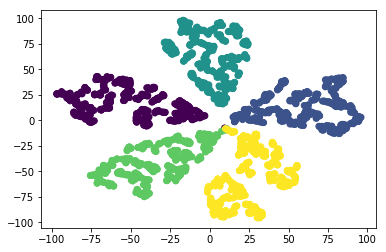

In [19]:
plt.scatter(proj_x[:, 0], proj_x[:, 1], c=y_train)

# Clustering the dataset1

## Kmeans

In [133]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(X_train.T)

In [134]:
clusters_kmeans = kmeans.predict(X_train.T)

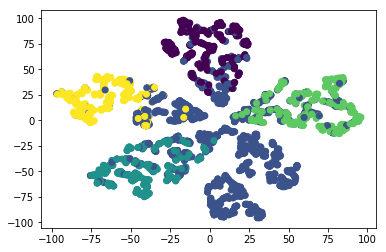

In [135]:
plt.scatter(proj_x[:, 0], proj_x[:, 1], c=clusters_kmeans)

In [136]:
metrics.homogeneity_score(y_train, clusters_kmeans)

0.4677341913379719

## NMF

In [76]:
def clustering_NMF(H):
    l,c = H.shape
    labels_NMF = []
    for index in range(c):

        col = H[:,index]

        cluster = np.argmax(col)

        labels_NMF.append(cluster)
    
    return labels_NMF

In [80]:
W,H = simple_nmf(X_train,5,50)#,print_enabled=True)

Applying multiplicative updates on the input matrix...


In [81]:
labels_NMF = clustering_NMF(H)

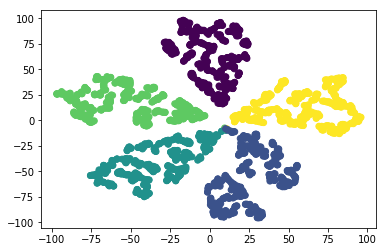

In [93]:
plt.scatter(proj_x[:, 0], proj_x[:, 1], c=labels_NMF)

In [78]:
homogeneity_score(y_train,labels_NMF)

0.9964133528225343

## Creating synthetic dataset 2

In [89]:
np.random.seed(0)
X_train_2 = []
y_train_2 = []
k=0
for i in range(5):
    k += 10*i
    for j in range(500):
        X_train_2.append([2*np.random.rand() for _ in range(10)])
        X_train_2[-1][2*i] = np.random.randint(3, 8+j)
        X_train_2[-1][2*i+1] = np.random.randint(3, 8+j)
        y_train_2.append(i)

X_train_2 = np.array(X_train_2).T
y_train_2 = np.array(y_train_2)

## Viewing synthetic dataset 2

In [90]:
tsne_2 = TSNE(n_components=2, perplexity=10.0, random_state=2 )

In [91]:
proj_x_2 = tsne_2.fit_transform(X_train_2.T)

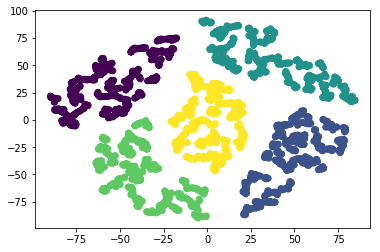

In [92]:
plt.scatter(proj_x_2[:, 0], proj_x_2[:, 1], c=y_train_2)

# Clustering the dataset2

## Kmeans

In [126]:
kmeans_2 = KMeans(n_clusters=5,random_state=0).fit(X_train_2.T)

In [127]:
clusters_kmeans_2 = kmeans_2.predict(X_train_2.T)

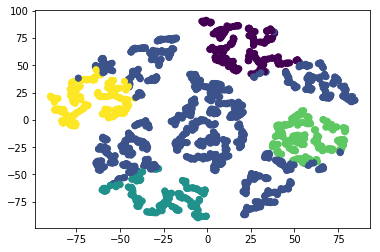

In [128]:
plt.scatter(proj_x_2[:, 0], proj_x_2[:, 1], c=clusters_kmeans_2)

In [129]:
metrics.homogeneity_score(y_train, clusters_kmeans_2)

0.4677341913379719

## Applying kmeans in the tsne projection

In [120]:
kmeans_3 = KMeans(n_clusters=5,random_state=0).fit(proj_x_2)

In [121]:
clusters_kmeans_3 = kmeans_3.predict(proj_x_2)

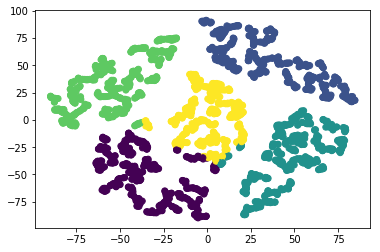

In [122]:
plt.scatter(proj_x_2[:, 0], proj_x_2[:, 1], c=clusters_kmeans_3)

In [123]:
metrics.homogeneity_score(y_train, clusters_kmeans_3)

0.9133069114638998

## NMF

In [100]:
W_2,H_2 = simple_nmf(X_train_2,5,50)#,print_enabled=True)

Applying multiplicative updates on the input matrix...


In [101]:
labels_NMF_2 = clustering_NMF(H_2)

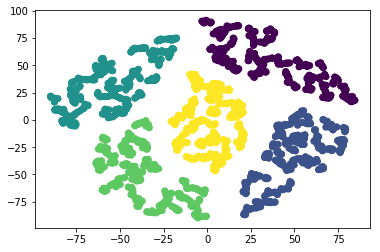

In [102]:
plt.scatter(proj_x_2[:, 0], proj_x_2[:, 1], c=labels_NMF_2)

In [104]:
homogeneity_score(y_train,labels_NMF_2)

1.0

## Applying kmeans in the NMF projection

In [138]:
kmeans_4 = KMeans(n_clusters=5,random_state=0).fit(H_2)

In [139]:
clusters_kmeans_4 = kmeans_4.predict(H_2)

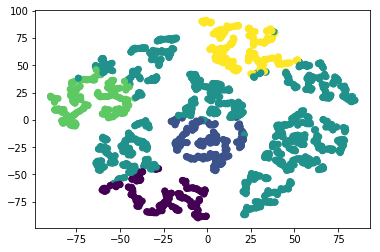

In [140]:
plt.scatter(proj_x_2[:, 0], proj_x_2[:, 1], c=clusters_kmeans_4)

In [141]:
metrics.homogeneity_score(y_train, clusters_kmeans_4)

0.46364005415243326